In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stores_df=pd.read_csv("Stores.csv")
stores_df.head(5)

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


<font color="green"><h3>1.Handling missing values</h3></font>

In [3]:
missing_values = stores_df.isnull().sum()

print(missing_values)

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64


<font color="green"><h3>1.1 Checking for skewness</h3></font>

C:\Users\dilib\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Square Meters', ylabel='Count'>

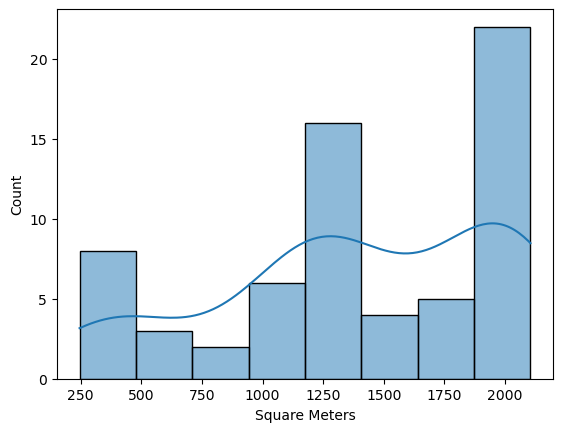

In [4]:
sns.histplot(stores_df['Square Meters'], kde=True)

<font color="green"><h3>1.2 Filling missing value with median
</h3></font>

In [5]:
#since the data is skewed it's better to fill missing value with median
stores_df['Square Meters'].fillna(stores_df['Square Meters'].median(),inplace=True)


In [6]:
stores_df['Square Meters'].isnull().sum()

0

<font color="green"><h3>2.Checking for duplicates</h3></font>

In [7]:
duplicates=stores_df.duplicated(subset=['StoreKey'])
print(duplicates.sum())

0


<font color="green"><h3>3.Correcting datatype</h3></font>

In [8]:
stores_df['Open Date'] = pd.to_datetime(stores_df['Open Date'], format='%m/%d/%Y')
stores_df['Open Date'].dtype

dtype('<M8[ns]')

<font color="green"><h3>4.Importing file to csv</h3></font>

In [9]:
stores_df.to_csv('cleaned_Stores.csv', index=False)